# **LINE CHARTS**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

CONNECT DATABASE AND LOAD DATASET

In [2]:
# Connect Database
conn = sqlite3.connect('my_analysis.db')

# Load Dataset
query = "SELECT * FROM Main"
df =pd.read_sql_query(query, conn)

# Set column max views
pd.set_option("display.max_columns", None)

# Check head
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,None,None,None,None,None,None,None,None,None,United States of America,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,I have never visited Stack Overflow or the Sta...,None,None,None,None,None,Yes,Very favorable,Increase productivity,None,None,None,None,None,None,None,None,None,None,None,None,None,No,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",None,None,None,None,None,United Kingdom of Great Britain and Northern I...,None,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,None,None,None,None,None,None,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,None,None,None,Microsoft Teams;Slack,Slack,Slack,None,None,None,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",None,None,None,None,None,None,None,None,Non

---

#### TRENDS IN COMPENSATION OVER AGE GROUPS

Line Chart of Median `ConvertedCompYearly` by Age Group

In [3]:
# Fix Age column to categorical

age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}
age_order = ['Under 18 years old','18-24 years old','25-34 years old',
             '35-44 years old', '45-54 years old','55-64 years old',
             '65 years or older']

# Convert Age column to categorical
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Create numerical age column
df['Num_Age'] = df['Age'].map(age_map)


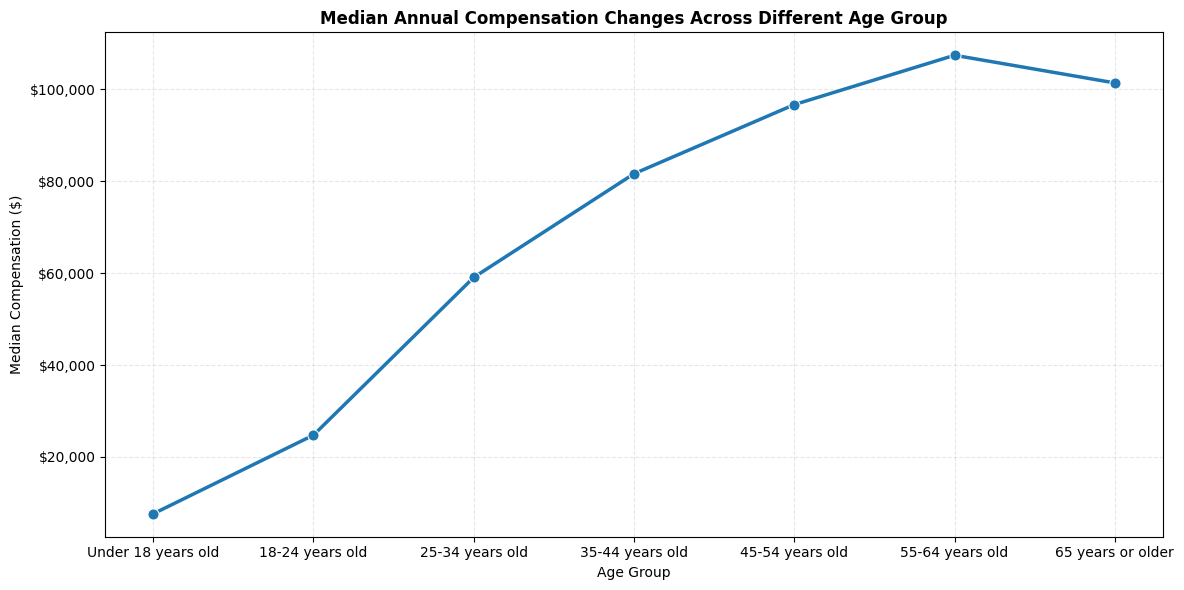

In [4]:
import matplotlib.ticker as mticker

# Select Data
comp_age = df[df['ConvertedCompYearly'] < 300000][['ConvertedCompYearly', 'Age', 'Num_Age']].dropna().copy()

# Calculate
median_comp = comp_age.groupby('Age', observed=True)['ConvertedCompYearly'].median().reset_index()

# Line Chart
plt.figure(figsize=(12, 6))

sns.lineplot(
    median_comp,
    x='Age',
    y='ConvertedCompYearly',
    marker='o',
    color='tab:blue',
    linewidth=2.5,
    markersize=8
)

plt.title("Median Annual Compensation Changes Across Different Age Group", fontsize=12, weight='bold')
plt.ylabel("Median Compensation ($)")
plt.xlabel("Age Group")

# Format Y-Axis to show $100k instead of 100000
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Add grid
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Line Chart of Median `ConvertedCompYearly` for ages 25 to 45

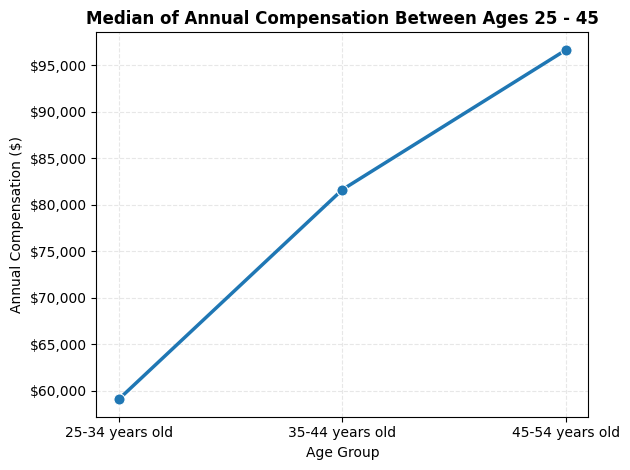

In [5]:
# Filter data
plot_df = median_comp[median_comp['Age'].str.contains('25|44|45')]

# Line chart
sns.lineplot(plot_df, x='Age', y='ConvertedCompYearly', marker='o',
             color='tab:blue', linewidth=2.5, markersize=8)

plt.title("Median of Annual Compensation Between Ages 25 - 45", fontsize=12, weight='bold')
plt.xlabel("Age Group")
plt.ylabel("Annual Compensation ($)")

# Set yticks
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Grid
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

---

#### TRENDS IN JOB SATISFACTION BY EXPERIENCE LEVEL

Line chart of Job Satisfaction (`JobSatPoints_6`) by Experience level

In [6]:
# Fix experience column
# Create exp years map
exp_map = {
    'More than 50 years': 51,
    'Less than 1 year': 0
}

# Drop NaN
df = df.dropna(subset=['YearsCode', 'YearsCodePro'])

# Apply map and convert to integer
df[['YearsCode', 'YearsCodePro']] = df[['YearsCode', 'YearsCodePro']].replace(exp_map).astype('int')

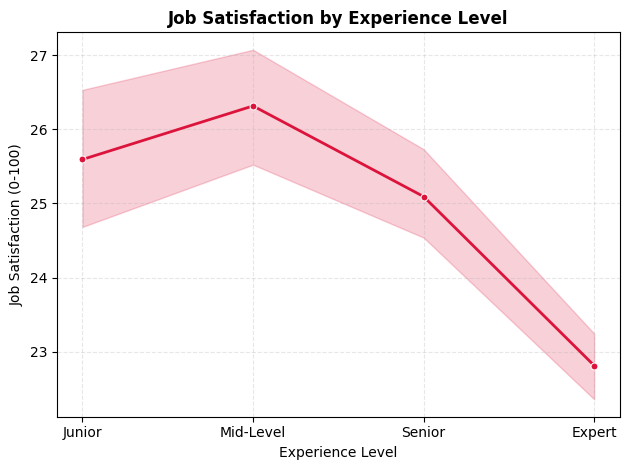

In [20]:
# Select Data
jobsat_exp = df[['JobSatPoints_6', 'YearsCodePro']].dropna().copy()

# Create experience level bins
bins = [-1, 2, 5, 10, 100]
labels = ['Junior', 'Mid-Level', 'Senior', 'Expert']

jobsat_exp['Experience_Level'] = pd.cut(jobsat_exp["YearsCodePro"], bins=bins, labels=labels)
median_sat = jobsat_exp.groupby('Experience_Level', observed=True)['JobSatPoints_6'].median().reset_index()

# Line chart
sns.lineplot(jobsat_exp, x='Experience_Level', y='JobSatPoints_6',
             marker='o', linewidth=2, markersize=5, color='crimson')

plt.title("Job Satisfaction by Experience Level", fontsize=12, weight='bold')
plt.xlabel("Experience Level")
plt.ylabel("Job Satisfaction (0-100)")
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

---

#### TRENDS IN JOB SATISFACTION AND COMPENSATION BY EXPERIENCE

Line Chart of Median `ConvertedCompYearly` over Experience Level

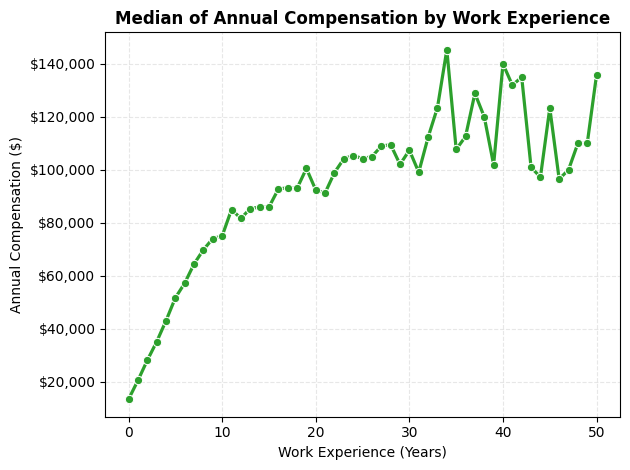

In [37]:
comp_exp = df[['ConvertedCompYearly', 'WorkExp']].dropna().copy()

median_comp = comp_exp.groupby('WorkExp')['ConvertedCompYearly'].median().reset_index()

# Line Chart
sns.lineplot(median_comp, x='WorkExp', y='ConvertedCompYearly',
             marker='o', linewidth=2.3, markersize='6', color='tab:green')

plt.title("Median of Annual Compensation by Work Experience", fontsize=12, weight='bold')
plt.xlabel("Work Experience (Years)")
plt.ylabel("Annual Compensation ($)")
plt.grid(True, linestyle='--', alpha=0.3)

# set yticks
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

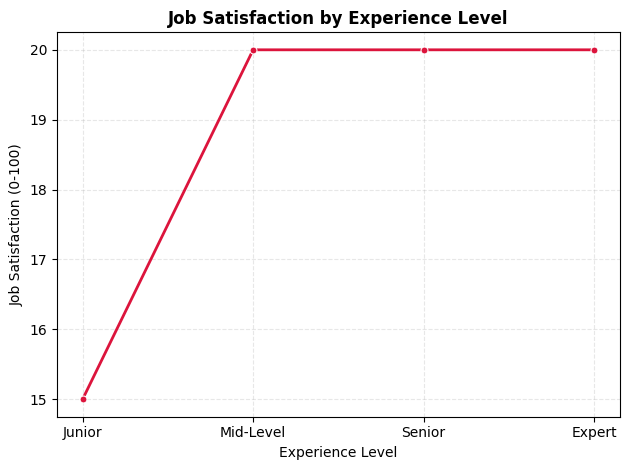

In [41]:
# Select Data
jobsat_exp = df[['JobSatPoints_6', 'YearsCodePro']].dropna().copy()

# Create experience level bins
bins = [-1, 2, 5, 10, 100]
labels = ['Junior', 'Mid-Level', 'Senior', 'Expert']

jobsat_exp['Experience_Level'] = pd.cut(jobsat_exp["YearsCodePro"], bins=bins, labels=labels)
median_sat = jobsat_exp.groupby('Experience_Level', observed=True)['JobSatPoints_6'].median().reset_index()

# Line chart
sns.lineplot(median_sat, x='Experience_Level', y='JobSatPoints_6',
             marker='o', linewidth=2, markersize=5, color='crimson')

plt.title("Job Satisfaction by Experience Level", fontsize=12, weight='bold')
plt.xlabel("Experience Level")
plt.ylabel("Job Satisfaction (0-100)")
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

---

In [42]:
conn.close()

---

#### **Summary**

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.